In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/CNN/'

3_Classes_Image_Classification.ipynb  Vehicle_Data
dataset				      Vehicle_Trained_Model_S128E25.h5
Image_Classification_using_CNN.ipynb  Vehicle_Trained_Model_S256E15.h5
Load_Saved_model.ipynb		      Vehicle_Trained_Model_S256E25.h5
my_model.h5			      Vehicle_Trained_Model_S64E20.h5
Sports_Celebrity_Data


In [ ]:
dataset_path = '/content/drive/My Drive/CNN/dataset/'

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [ ]:
# lists to hold data

images = []
labels = []

In [ ]:
# listing all folder names in the specified path
folders = os.listdir(dataset_path)
folders

['cars', 'trains', 'planes']

In [ ]:
# Creating dictionaries to map folder names

name_mapping_dict = {'cars': 0,
                     'trains': 1,
                     'planes': 2
                     }


inv_name_mapping_dict =  {v: k for k, v in name_mapping_dict.items()}

print(inv_name_mapping_dict)

{0: 'cars', 1: 'trains', 2: 'planes'}


In [ ]:
# Setting image size
img_size = 256
# image_size = 128

In [ ]:
# looping through each folder and getting images and creating labels
for folder in folders:
  print(f'Processing folder: {folder}')
  filenames = os.listdir(dataset_path+folder+'/')

  for fname in filenames:
    img = plt.imread(dataset_path+folder+'/'+fname) 
    img = cv2.resize(img, (img_size, img_size))
    images.append(img)
    labels.append(name_mapping_dict[folder])

Processing folder: cars
Processing folder: trains
Processing folder: planes


In [ ]:
# Converting lists to numpy arrays for easy matrix operations
images = np.array(images)
labels = np.array(labels)

In [ ]:
print('images shape : ', images.shape)
print('labels shape : ', labels.shape)

images shape :  (1200, 256, 256, 3)
labels shape :  (1200,)


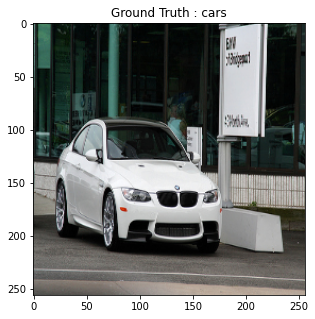

In [ ]:
# Plotting samples from data to check if data has been read successfully
img_number = 65
plt.figure(figsize=[10,5])
#plt.imshow(images[img_number,:,:])
plt.imshow(images[img_number,:,:].astype('uint8'))
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

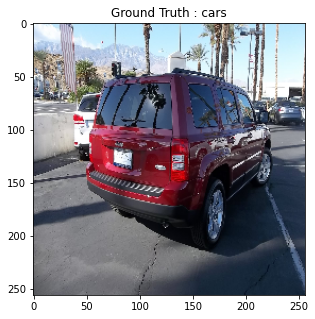

In [ ]:
# Plotting samples from data to check if data has been read successfully
img_number = 207
plt.figure(figsize=[10,5])
#plt.imshow(images[img_number,:,:])
plt.imshow(images[img_number,:,:].astype('uint8'))
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

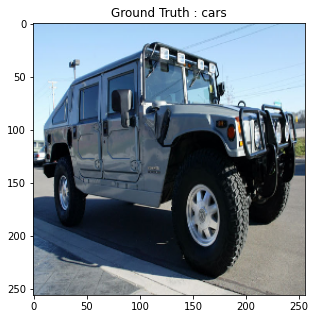

In [ ]:
# Plotting samples from data to check if data has been read successfully
img_number = 306
plt.figure(figsize=[10,5])
#plt.imshow(images[img_number,:,:])
plt.imshow(images[img_number,:,:].astype('uint8'))
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

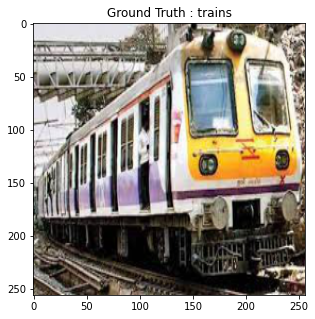

In [ ]:
# Plotting samples from data to check if data has been read successfully
img_number = 406
plt.figure(figsize=[10,5])
#plt.imshow(images[img_number,:,:])
plt.imshow(images[img_number,:,:].astype('uint8'))
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(labels)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

Total number of outputs :  3
Output classes :  [0 1 2]


In [ ]:
# Normalize training image pixels
images = np.array(images) / 255

In [ ]:
# Change the labels from integer to categorical data
labels_one_hot = to_categorical(labels)

In [ ]:
labels[303]

0

In [ ]:
labels_one_hot[303]

array([1., 0., 0.], dtype=float32)

In [ ]:
# Shuffling and Splittng Dataset
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(images, labels_one_hot, test_size=0.10, shuffle=True, random_state=0)


print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (1080, 256, 256, 3) (1080, 3)
Testing data shape :  (120, 256, 256, 3) (120, 3)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten 

# Same padding: This padding ensures that the output layer has the same size as the input layer
model = Sequential()
model.add(Conv2D(32, 3, padding="same", activation="relu", input_shape=(img_size, img_size, 3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(classes_num, activation="softmax"))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, verbose=1, 
                   validation_data=(test_images, test_labels))

Epoch 1/20
9/9 [==============================] - 97s 10s/step - loss: 1.7253 - accuracy: 0.4185 - val_loss: 0.9564 - val_accuracy: 0.5250
Epoch 2/20
9/9 [==============================] - 101s 11s/step - loss: 0.6990 - accuracy: 0.7398 - val_loss: 0.5697 - val_accuracy: 0.7083
Epoch 3/20
9/9 [==============================] - 93s 10s/step - loss: 0.3911 - accuracy: 0.8306 - val_loss: 0.4104 - val_accuracy: 0.8083
Epoch 4/20
9/9 [==============================] - 93s 10s/step - loss: 0.2613 - accuracy: 0.8954 - val_loss: 0.3145 - val_accuracy: 0.8833
Epoch 5/20
9/9 [==============================] - 94s 10s/step - loss: 0.1682 - accuracy: 0.9417 - val_loss: 0.2639 - val_accuracy: 0.8833
Epoch 6/20
9/9 [==============================] - 94s 10s/step - loss: 0.1129 - accuracy: 0.9639 - val_loss: 0.2720 - val_accuracy: 0.8917
Epoch 7/20
9/9 [==============================] - 95s 10s/step - loss: 0.0818 - accuracy: 0.9769 - val_loss: 0.2514 - val_accuracy: 0.9000
Epoch 8/20
9/9 [==========

In [ ]:
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc*100))

[train_loss, train_acc] = model.evaluate(train_images, train_labels)
print("Evaluation result on Train Data : Loss = {}, accuracy = {}".format(train_loss, train_acc*100))

4/4 [==============================] - 3s 754ms/step - loss: 0.3976 - accuracy: 0.9083
Evaluation result on Test Data : Loss = 0.3976377546787262, accuracy = 90.83333611488342
34/34 [==============================] - 44s 1s/step - loss: 4.3123e-04 - accuracy: 1.0000
Evaluation result on Train Data : Loss = 0.00043122973875142634, accuracy = 100.0


In [ ]:
model_path = '/content/drive/My Drive/CNN/'

model.save(model_path+'dataset_S256E20.h5')

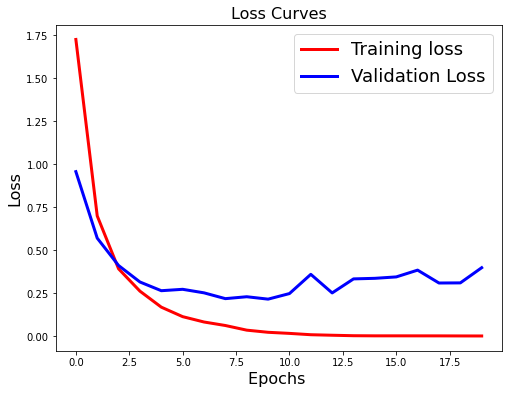

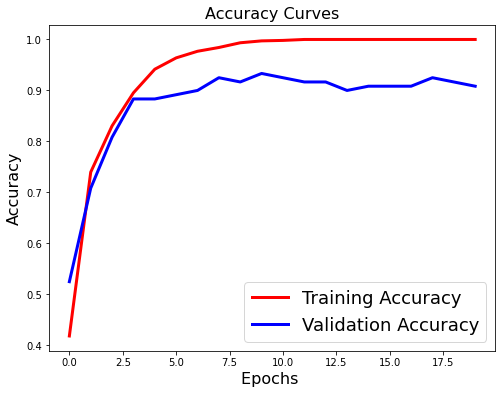

In [ ]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

Model prediction: planes


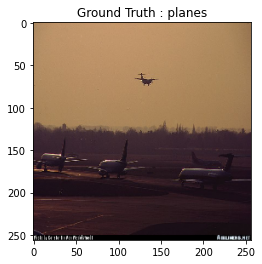

In [ ]:
# Predict the most likely class
test_img_number = 11

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: planes


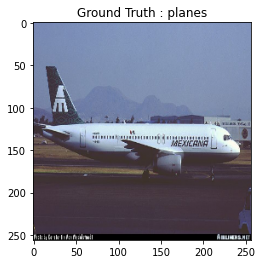

In [ ]:
# Predict the most likely class
test_img_number = 20

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: trains


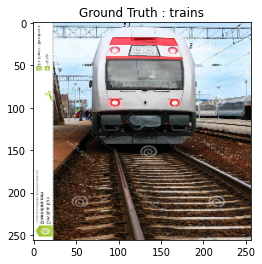

In [ ]:
# Predict the most likely class
test_img_number = 115

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: planes


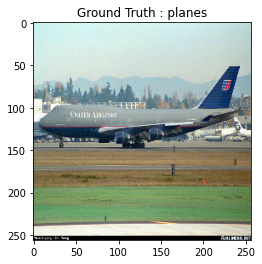

In [ ]:
# Predict the most likely class
test_img_number = 21

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: trains


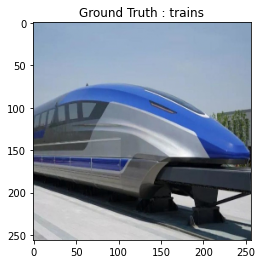

In [ ]:
# Predict the most likely class
test_img_number = 34

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: planes


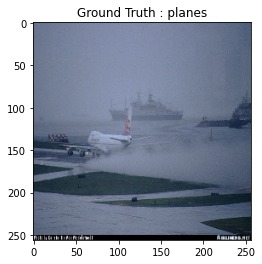

In [ ]:
# Predict the most likely class
test_img_number = 40

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: trains


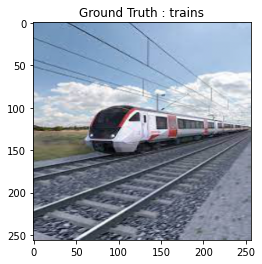

In [ ]:
# Predict the most likely class
test_img_number = 5

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: cars


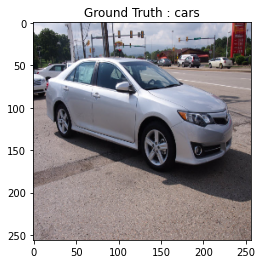

In [ ]:
# Predict the most likely class
test_img_number = 43

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: cars


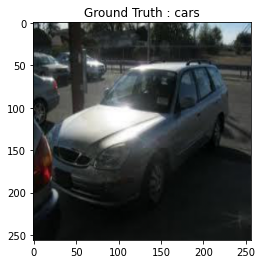

In [ ]:
# Predict the most likely class
test_img_number = 31

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: cars


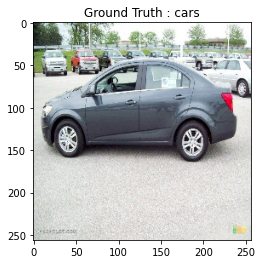

In [ ]:
# Predict the most likely class
test_img_number = 30

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: cars


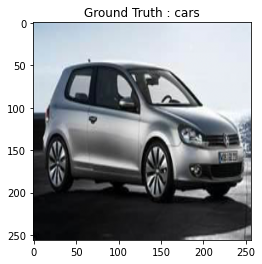

In [ ]:
# Predict the most likely class
test_img_number = 13

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: trains


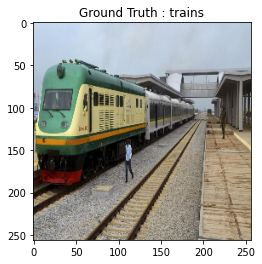

In [ ]:
# Predict the most likely class
test_img_number = 111

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: planes


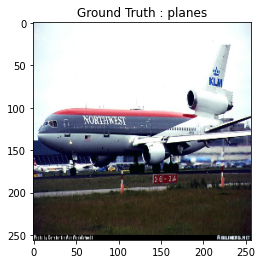

In [ ]:
# Predict the most likely class
test_img_number = 32

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()